In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [40]:
ball = pd.read_csv("/Users/annadaugaard/Desktop/VFF/explore/ball_tracking_VFF.csv")

In [41]:
ball = ball.dropna()

In [45]:


# Calculate differences to compute speed
ball['dx'] = ball['ball_x'].diff()
ball['dy'] = ball['ball_y'].diff()
ball['dt'] = ball['time'].diff()

# Calculate speed (Euclidean distance per time difference)
ball['speed'] = np.sqrt(ball['dx']**2 + ball['dy']**2) / ball['dt']

ball['acceleration'] = ball["speed"].diff() / ball['time'].diff()
#ball = ball[ball['speed'] <= 36]
# Drop intermediate calculation columns from the cleaned tracking data
ball.drop(columns=['dx', 'dy', 'dt'], inplace=True)


window_size = 5
# Create a new column for the moving average smoothed acceleration
ball['smoothed_acceleration'] = ball['acceleration'].rolling(window=window_size, center=True).mean()
ball['smoothed_acceleration_observed'] = [1 if abs(x) >= 5 else 0 for x in ball['acceleration']]


In [37]:

# Calculate differences to compute speed
ball['dx'] = ball['ball_x'].diff()
ball['dy'] = ball['ball_y'].diff()
ball['dt'] = ball['time'].diff()
# Calculate speed (Euclidean distance per time difference)
ball['speed'] = np.sqrt(ball['dx']**2 + ball['dy']**2) / ball['dt']


In [43]:
ball

,index,time,ball_x,ball_y,period,speed,acceleration,smoothed_acceleration,smoothed_acceleration_observed
0,0,0.00,53.64,34.10,1,NaN,NaN,NaN,0
1,1,0.04,54.30,34.35,1,17.644050,NaN,NaN,0
2,2,0.08,55.06,34.45,1,19.163768,37.992948,NaN,0
3,3,0.12,55.74,34.62,1,17.523199,-41.014225,NaN,0
4,4,0.16,56.39,34.77,1,16.677080,-21.152971,-6.586541,1
...,...,...,...,...,...,...,...,...,...
103714,103714,2905.52,105.60,34.66,2,0.000000,0.000000,0.000000,0
103715,103715,2905.56,105.60,34.66,2,0.000000,0.000000,0.000000,0
103716,103716,2905.60,105.60,34.66,2,0.000000,0.000000,0.000000,0
103717,103717,2905.64,105.60,34.66,2,0.000000,0.000000,NaN,0


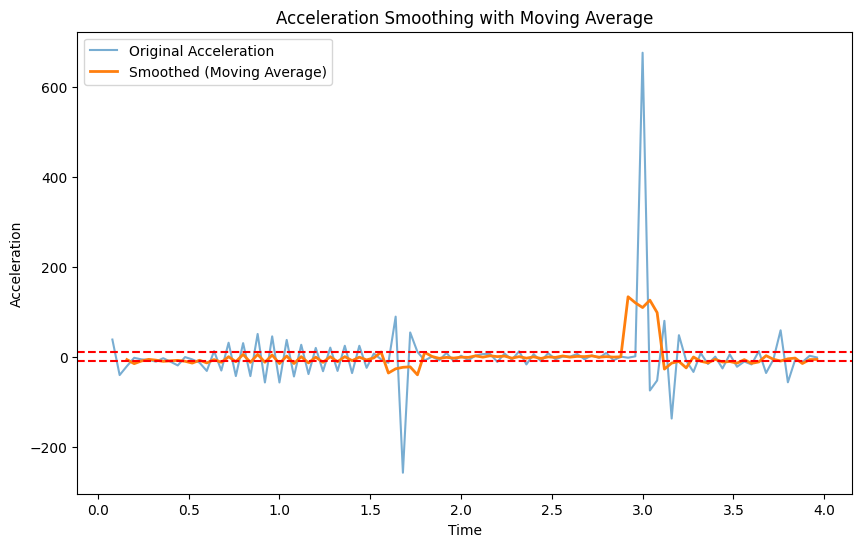

In [44]:

# Plot for comparison
plt.figure(figsize=(10,6))
plt.plot(ball['time'][0:100], ball['acceleration'][0:100], label='Original Acceleration', alpha=0.6)
plt.plot(ball['time'][0:100], ball['smoothed_acceleration'][0:100], label='Smoothed (Moving Average)', linewidth=2)
plt.axhline(y=10, color='red', linestyle='--', linewidth=1.5) 
plt.axhline(y=-10, color='red', linestyle='--', linewidth=1.5)
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.title("Acceleration Smoothing with Moving Average")
plt.show()

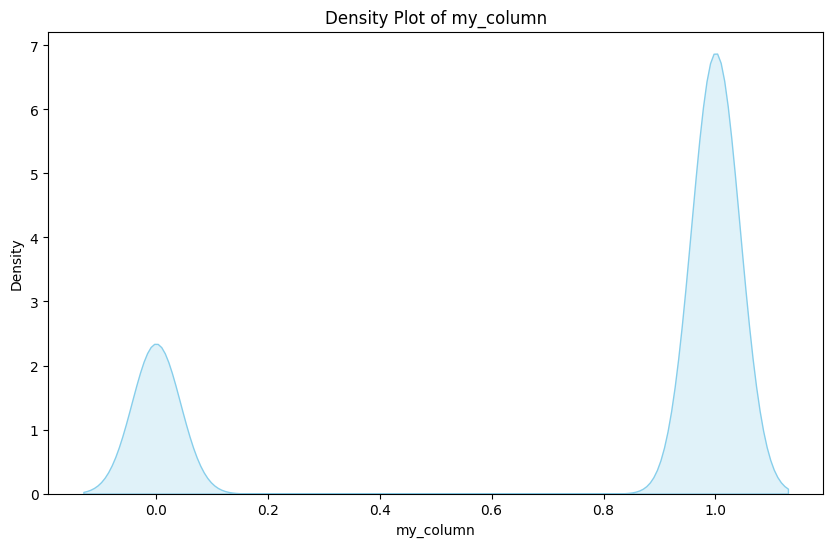

In [46]:
# Define a threshold for outliers (e.g., z-score > 3 or < -3)

# Create a density plot on the column 'my_column'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=ball, x='smoothed_acceleration_observed', fill=True, color='skyblue')
plt.title('Density Plot of my_column')
plt.xlabel('my_column')
plt.ylabel('Density')
plt.show()

In [85]:
viborg_players = pd.read_csv("/Users/annadaugaard/Desktop/VFF/explore/viborg_players_tracking.csv")

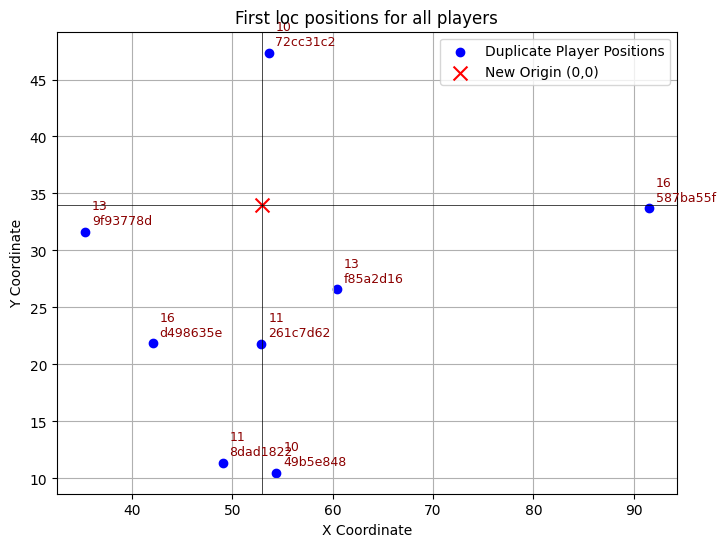

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'player_id': ['037bde83-261d-4062-8ea8-a18a3e7f7ad0', '20369dd6-c959-427c-80ce-4c9b4d8bf888',
                  '261c7d62-d32e-44c8-a728-5b62df237386', '2a5f69ac-5fbb-48f2-9f0b-f34f93bcb8c9',
                  '2cccce55-d61b-4e71-8b42-29e11b1fb204', '35fccdd1-0ce2-44b7-81d6-02c12f74e1bd',
                  '3fe4590a-9b62-4862-b173-96a2b254693e', '45acfe4e-4812-4854-a8bb-6326c972d185',
                  '49b5e848-248d-4c03-96a9-c2a7d391f8b5', '4ade4034-c4d7-4c16-8984-0cef41d37f35',
                  '587ba55f-2607-4e5d-8b6f-8b94c119b81d', '61414b28-9922-4593-aef6-763b7fecc38b',
                  '72cc31c2-1e46-4249-900f-a4158dbe438d', '7b1d8a9a-f81b-4b5c-b9bb-4d9c97c745ad',
                  '8dad1822-e63d-4fde-8ebf-77740c65b478', '9f93778d-7f94-43e3-b02e-7ae424074c9e',
                  'a5f06ef3-cfe8-4d24-b6fd-ccc350ed844c', 'b82b47f6-922d-4cf7-a84e-b4309d7431ae',
                  'd498635e-afde-4024-b06b-4840308ef8a7', 'd6fdf0d3-e202-41ac-89d8-d6e5094fc449',
                  'dbc303d2-8d8b-41f9-b2df-5f37b19480b0', 'f85a2d16-66b4-4257-a907-f97486da6a83'],
    'unique_id': ['viborg'] * 22,
    'period': [1] * 22,
    'time': [0.0] * 22,
    # These numbers correspond to jersey numbers (player_num)
    'player_num': [12, 14, 11, 8, 28, 23, 18, 24, 10, 6, 16, 17, 10, 20, 11, 13, 4, 19, 16, 2, 1, 13],
    'x': [52.77, 36.87, 52.89, 54.96, 53.07, 57.54, 67.18, 73.17, 54.40, 36.80, 91.50, 44.18,
          53.61, 36.58, 49.04, 35.33, 36.03, 53.44, 42.05, 71.15, 7.73, 60.39],
    'y': [33.78, 45.35, 21.82, 45.76, 5.80, 12.03, 56.73, 36.32, 10.50, 15.22, 33.69, 30.64,
          47.35, 15.31, 11.37, 31.65, 25.80, 25.20, 21.88, 20.55, 33.85, 26.58],
    'z': [0.0] * 22,
    'spd': [0.0] * 22
}

df = pd.DataFrame(data)

# Your dictionary for home team numbers
teams_dict = {"home": [16, 24, 18, 8, 12, 13, 11, 10, 23, 28, 2]}

# Assign team based on player_num membership in teams_dict["home"]
# If player_num is in the list, assign "home", else assign "away"
df['team'] = df['player_num'].apply(lambda x: 'home' if x in teams_dict["home"] else 'away')

# Identify duplicated player numbers (those that appear more than once)
duplicates = df[df.duplicated(subset='player_num', keep=False)]

# Plot only the duplicates so you can visually inspect them
plt.figure(figsize=(8, 6))
plt.scatter(duplicates['x'], duplicates['y'], color='blue', label='Duplicate Player Positions')

# Annotate each duplicate with its player_num and player_id (or any other identifier)
for idx, row in duplicates.iterrows():
    label_text = f"{row['player_num']}\n{row['player_id'][:8]}"  # show player_num and first 8 chars of id
    plt.annotate(label_text, (row['x'], row['y']),
                 textcoords="offset points", xytext=(5, 5),
                 fontsize=9, color='darkred')


plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Draw the reference lines for the new origin
plt.axhline(34, color='black', linewidth=0.5)
plt.axvline(53, color='black', linewidth=0.5)

# Plot a red cross at the new origin
plt.scatter(53, 34, color='red', marker='x', s=100, label='New Origin (0,0)')

plt.title('First loc positions for all players')
plt.grid(True)
plt.legend()
plt.show()

# At this point, visually inspect the plot.
# You can then decide (manually or programmatically) which duplicate should be assigned which team.
# For example, you might update the 'team' column for a specific duplicate as follows:
# df.loc[df['player_id'] == 'd6fdf0d3-e202-41ac-89d8-d6e5094fc449', 'team'] = 'home'
# (Replace the condition with your selection criteria.)


In [86]:
# Your dictionary defining home team ids
away = {"away":["72cc31c2","9f93778d","d498635e","8dad1822"]}
teams_dict = {"home": [16, 24, 18, 8, 12, 13, 11, 10, 23, 28, 2]}

# Option 1: Using apply with a lambda function
viborg_players['Team'] = viborg_players['player_num'].apply(lambda x: 'home' if x in teams_dict["home"] else 'away')
viborg_players.loc[viborg_players['player_id'].str[:8].isin(away["away"]), 'Team'] = 'away'


In [87]:
viborg_players.rename(columns={
    'player_id': 'unique_player_id',
    'player_num': 'id',
    'timestamp': 'time',
}, inplace=True)

In [88]:
# Use only first period 

viborg_players = viborg_players[viborg_players["period"] == 1]
ball = ball[ball["period"] == 1]

In [89]:
players_and_ball = viborg_players.merge(ball, on="time", how="left")

In [90]:
players_and_ball = players_and_ball.dropna()
# Compute the Euclidean distance from the player (x, y) to the ball (ball_x, ball_y)
players_and_ball["distance_to_ball"] = np.sqrt((players_and_ball["x"] - players_and_ball["ball_x"])**2 +
                                          (players_and_ball["y"] - players_and_ball["ball_y"])**2)

# For each time point, rank the players by distance (1 = closest)
players_and_ball["distance_rank"] = players_and_ball.groupby("time")["distance_to_ball"].rank(method="min")
threshold = 3.0

# For each time point, count how many players are within the threshold distance to the ball.
# We use groupby with transform so that every row for the same time gets the same count.
players_and_ball["uncertainty_index"] = players_and_ball.groupby("time")["distance_to_ball"].transform(
    lambda x: (x <= threshold).sum()
)

rank_1= players_and_ball[players_and_ball["distance_rank"] == 1]
rank_1= players_and_ball[players_and_ball["distance_to_ball"] < 2]
rank_1_index= rank_1[rank_1["smoothed_acceleration_observed"] == 1]

In [91]:
np.median(rank_1["distance_to_ball"])

np.float64(0.8202438661763953)

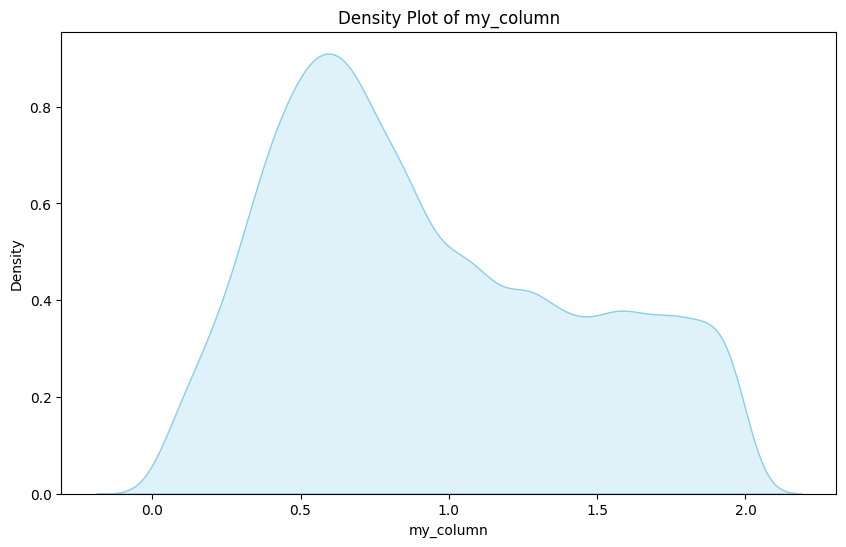

In [92]:
# Define a threshold for outliers (e.g., z-score > 3 or < -3)
import matplotlib.pyplot as plt

import seaborn as sns
# Create a density plot on the column 'my_column'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=rank_1, x='distance_to_ball', fill=True, color='skyblue')
plt.title('Density Plot of my_column')
plt.xlabel('my_column')
plt.ylabel('Density')
plt.show()

In [93]:
import numpy as np
import pandas as pd

def resolve_ties_by_team(df):
    """Resolve ties at the same timestamp by checking previous and next team's alignment."""
    unique_times = df["time"].unique()
    resolved = []
    for i, t in enumerate(unique_times):
        candidates = df[df["time"] == t]
        if len(candidates) == 1:
            resolved.append(candidates.iloc[0])
        else:
            # If we have a previous candidate, use its team.
            if resolved:
                prev_team = resolved[-1]["Team"]
            else:
                prev_team = None

            # Look at next unique time (if exists)
            if i < len(unique_times) - 1:
                next_time = unique_times[i+1]
                next_candidates = df[df["time"] == next_time]
                next_team = next_candidates.iloc[0]["Team"] if len(next_candidates) > 0 else None
            else:
                next_team = None

            chosen = None
            # 1) Try matching both prev_team & next_team.
            if prev_team and next_team:
                both = candidates[(candidates["Team"] == prev_team) & (candidates["Team"] == next_team)]
                if len(both) == 1:
                    chosen = both.iloc[0]
            # 2) If not, try matching prev_team.
            if chosen is None and prev_team:
                match_prev = candidates[candidates["Team"] == prev_team]
                if len(match_prev) == 1:
                    chosen = match_prev.iloc[0]
            # 3) If still not, try matching next_team.
            if chosen is None and next_team:
                match_next = candidates[candidates["Team"] == next_team]
                if len(match_next) == 1:
                    chosen = match_next.iloc[0]
            # 4) Fallback: choose the first candidate.
            if chosen is None:
                chosen = candidates.iloc[0]
            resolved.append(chosen)
    return pd.DataFrame(resolved).reset_index(drop=True)

def compress_consecutive_id(df):
    """
    Group consecutive rows with the same id into a single block with start/end times.
    Only blocks with at least 3 observations (count >= 3) are retained.
    """
    blocks = []
    current_block = None
    for _, row in df.iterrows():
        if current_block is None:
            # Start a new block with count 1.
            current_block = {
                "id": row["id"],
                "Team": row["Team"],
                "start_time": row["time"],
                "end_time": row["time"],
                "count": 1
            }
        else:
            if row["id"] == current_block["id"]:
                current_block["end_time"] = row["time"]
                current_block["count"] += 1
            else:
                # Only add the block if it has at least 3 observations.
                if current_block["count"] >= 3:
                    blocks.append(current_block)
                # Start a new block for the new id.
                current_block = {
                    "id": row["id"],
                    "Team": row["Team"],
                    "start_time": row["time"],
                    "end_time": row["time"],
                    "count": 1
                }
    if current_block and current_block["count"] >= 3:
        blocks.append(current_block)
    return pd.DataFrame(blocks)

def build_pass_events(blocks_df, rank_df, uncertainty_col="uncertainty_index"):
    """
    Create a pass event for each adjacent pair of blocks, but only if both blocks belong to the same team.
    
    For each pass event, defined as the transition between adjacent blocks in blocks_df,
    we compute the mean uncertainty over the time interval from the start time of the current block
    to the start time of the next block using values from rank_df.
    
    Returns a DataFrame with columns:
      - "Start Time [s]"
      - "End Time [s]"
      - "From"
      - "To"
      - "uncertainty"
      - "Team" (the team for the event)
    """
    blocks_df = blocks_df.sort_values("start_time").reset_index(drop=True)
    events = []
    for i in range(len(blocks_df) - 1):
        # Only create a pass event if both blocks are on the same team.
        if blocks_df.loc[i, "Team"] != blocks_df.loc[i+1, "Team"]:
            continue
        start_time = blocks_df.loc[i, "start_time"]
        end_time = blocks_df.loc[i+1, "start_time"]
        # Filter rows from rank_df with times between start_time and end_time.
        subset = rank_df[(rank_df["time"] >= start_time) & (rank_df["time"] <= end_time)]
        uncertainty_value = subset[uncertainty_col].mean() if not subset.empty else np.nan
        events.append({
            "Start Time [s]": start_time,
            "End Time [s]": end_time,
            "From": blocks_df.loc[i, "id"],
            "To": blocks_df.loc[i+1, "id"],
            "uncertainty": uncertainty_value,
            "Team": blocks_df.loc[i, "Team"]
        })
    return pd.DataFrame(events)

# -------------------------------
# Example usage:
# Assume 'rank_1_index' is your original DataFrame with at least columns "time", "id", "Team", and "uncertainty_index".

# 1) Resolve ties in your DataFrame.
df_resolved = resolve_ties_by_team(rank_1_index)

# 2) Compress consecutive rows by id but only keep blocks with at least 3 observations.
df_blocks = compress_consecutive_id(df_resolved)

# 3) Build pass events from the valid blocks, computing uncertainty over the interval.
#    Only events where both blocks belong to the same team are kept.
df_passes = build_pass_events(df_blocks, rank_1_index, uncertainty_col="uncertainty_index")

df_passes


,Start Time [s],End Time [s],From,To,uncertainty,Team
0,1.48,5.52,24,10,1.000000,home
1,5.52,6.04,10,28,1.750000,home
2,8.48,10.08,20,6,1.909091,away
3,15.12,17.80,20,11,1.000000,away
4,18.44,19.12,23,2,1.250000,home
...,...,...,...,...,...,...
500,2671.16,2674.80,14,17,1.000000,away
501,2674.80,2677.80,17,16,1.382979,away
502,2677.80,2681.16,16,4,1.000000,away
503,2690.28,2697.56,17,16,1.000000,away


In [94]:
len(df_passes["To"].unique())

18

In [95]:
# Filter rows where (End Time [s] - Start Time [s]) <= 7
df_filtered = df_passes[(df_passes["End Time [s]"] - df_passes["Start Time [s]"]) <= 10]

In [96]:
len(df_filtered)

480

In [97]:
df_filtered

,Start Time [s],End Time [s],From,To,uncertainty,Team
0,1.48,5.52,24,10,1.000000,home
1,5.52,6.04,10,28,1.750000,home
2,8.48,10.08,20,6,1.909091,away
3,15.12,17.80,20,11,1.000000,away
4,18.44,19.12,23,2,1.250000,home
...,...,...,...,...,...,...
500,2671.16,2674.80,14,17,1.000000,away
501,2674.80,2677.80,17,16,1.382979,away
502,2677.80,2681.16,16,4,1.000000,away
503,2690.28,2697.56,17,16,1.000000,away


In [68]:
df_filtered.to_csv("test_for_streamit.csv")

In [77]:
players_and_ball.to_csv("gps_video_for_streamlit.csv")

In [98]:
df_filtered[df_filtered["From"] == 2]

,Start Time [s],End Time [s],From,To,uncertainty,Team
21,132.28,136.24,2,16,1.000000,home
23,140.72,145.16,2,16,1.000000,home
47,224.68,228.60,2,28,1.015873,home
50,232.76,235.08,2,16,1.000000,home
60,294.64,296.00,2,12,1.979592,home
78,368.60,371.20,2,16,1.000000,home
111,549.84,553.88,2,23,1.000000,home
113,557.80,560.84,2,16,1.000000,home
115,569.40,573.56,2,28,1.029412,home
127,683.76,684.48,2,10,5.785714,home


In [74]:
import io
import imageio
import matplotlib.pyplot as plt
import numpy as np

def create_video_of_events(players_and_ball, start_time, end_time, video_filename="events_video.mp4", fps=2):
    """
    Creates a video from player positions between start_time and end_time.
    Each frame shows the pitch and player positions (with their ids annotated).
    
    The pitch is drawn as a rectangle with x limits from 0 to 106 and y limits from 0 to 68,
    with the pitch center at (53,34).
    
    Parameters:
        players_and_ball (pd.DataFrame): DataFrame containing player positions. Expected columns: 
                                          "time", "x", "y", "id", "Team", and optionally "ball_x", "ball_y".
        start_time (float): The starting time for the video clip.
        end_time (float): The ending time for the video clip.
        video_filename (str): Output video file name.
        fps (int): Frames per second.
    """
    # Get all unique time points within the desired interval.
    times = sorted(players_and_ball["time"].unique())
    times = [t for t in times if start_time <= t <= end_time]
    
    frames = []
    
    # Define team colors (adjust colors as desired)
    unique_teams = players_and_ball["Team"].unique()
    team_colors = {team: color for team, color in zip(unique_teams, ["cornflowerblue", "tomato"])}
    
    for t in times:
        # Create a new figure and axis.
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Draw the pitch outline (0,0) to (106,68)
        pitch_outline = plt.Rectangle((0, 0), 106, 68, edgecolor="black", facecolor="none", lw=2)
        ax.add_patch(pitch_outline)
        
        # Draw the midline at x=53
        ax.axvline(x=53, color="black", lw=2)
        
        # Draw the center circle (approximate radius 9.15)
        center_circle = plt.Circle((53, 34), 9.15, color="black", fill=False, lw=2)
        ax.add_patch(center_circle)
        
        # Draw the center spot
        ax.scatter(53, 34, color="black", s=30)
        
        # Set the axis limits to the pitch dimensions
        ax.set_xlim(0, 106)
        ax.set_ylim(0, 68)
        
        # Filter the DataFrame for the current time.
        current_positions = players_and_ball[players_and_ball["time"] == t].copy()
        current_positions["color"] = current_positions["Team"].map(team_colors)
        
        # Plot player positions.
        ax.scatter(current_positions["x"], current_positions["y"],
                   edgecolor="black", facecolor=current_positions["color"], alpha=0.8)
        
        # Plot the ball if ball_x and ball_y exist.
        if "ball_x" in current_positions.columns and "ball_y" in current_positions.columns:
            ax.scatter(current_positions["ball_x"], current_positions["ball_y"],
                       edgecolor="black", facecolor="black", alpha=1, s=50)
        
        # Annotate each player with their id.
        for _, row in current_positions.iterrows():
            ax.text(row["x"], row["y"], str(row["id"]),
                    color="black", weight="bold", ha="center", va="center")
        
        ax.set_title(f"Time: {t:.2f} s")
        
        # Save the figure to a BytesIO buffer.
        buf = io.BytesIO()
        fig.savefig(buf, format="png", bbox_inches="tight")
        buf.seek(0)
        image = imageio.imread(buf)
        frames.append(image)
        plt.close(fig)
    
    # Write the frames to a video file.
    imageio.mimwrite(video_filename, frames, fps=fps)



In [82]:
import io
import imageio
import matplotlib.pyplot as plt
import numpy as np

def create_video_of_events(players_and_ball, start_time, end_time, video_filename="events_video.mp4", fps=2, highlight_ids=None):
    """
    Creates a video from player positions between start_time and end_time.
    Each frame shows the pitch and player positions. Only the players whose IDs are in 
    'highlight_ids' are annotated and are plotted in a different color.
    
    The pitch is drawn as a rectangle with x limits from 0 to 106 and y limits from 0 to 68,
    with the pitch center at (53,34).
    
    Parameters:
        players_and_ball (pd.DataFrame): DataFrame containing player positions.
            Expected columns: "time", "x", "y", "id", "Team", and optionally "ball_x", "ball_y".
        start_time (float): The starting time for the video clip.
        end_time (float): The ending time for the video clip.
        video_filename (str): Output video file name.
        fps (int): Frames per second.
        highlight_ids (list): List of player IDs (matching the "id" column) that should be highlighted.
    """
    if highlight_ids is None:
        highlight_ids = []
    
    # Get all unique time points within the desired interval.
    times = sorted(players_and_ball["time"].unique())
    times = [t for t in times if start_time <= t <= end_time]
    
    frames = []
    
    # Define team colors (adjust colors as desired)
    unique_teams = players_and_ball["Team"].unique()
    team_colors = {team: color for team, color in zip(unique_teams, ["cornflowerblue", "tomato"])}
    
    for t in times:
        # Create a new figure and axis.
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Draw the pitch outline (0,0) to (106,68)
        pitch_outline = plt.Rectangle((0, 0), 106, 68, edgecolor="black", facecolor="none", lw=2)
        ax.add_patch(pitch_outline)
        
        # Draw the midline at x=53
        ax.axvline(x=53, color="black", lw=2)
        
        # Draw the center circle (approximate radius 9.15)
        center_circle = plt.Circle((53, 34), 9.15, color="black", fill=False, lw=2)
        ax.add_patch(center_circle)
        
        # Draw the center spot
        ax.scatter(53, 34, color="black", s=30)
        
        # Set the axis limits to the pitch dimensions
        ax.set_xlim(0, 106)
        ax.set_ylim(0, 68)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        
        # Filter the DataFrame for the current time.
        current_positions = players_and_ball[players_and_ball["time"] == t].copy()
        current_positions["color"] = current_positions["Team"].map(team_colors)
        
        # Separate positions into highlighted and non-highlighted.
        highlighted = current_positions[current_positions["id"].isin(highlight_ids)]
        others = current_positions[~current_positions["id"].isin(highlight_ids)]
        
        # Plot non-highlighted player positions.
        ax.scatter(others["x"], others["y"],
                   edgecolor="black", facecolor=others["color"], alpha=0.8)
        
        # Plot highlighted player positions with a different color and larger markers.
        ax.scatter(highlighted["x"], highlighted["y"],
                   edgecolor="black", facecolor="gold", alpha=0.9, s=100, zorder=5)
        
        # Annotate only the highlighted players.
        for _, row in highlighted.iterrows():
            ax.text(row["x"], row["y"], str(row["id"]),
                    color="black", weight="bold", ha="center", va="center", fontsize=12)
        
        # Plot the ball if ball_x and ball_y exist.
        if "ball_x" in current_positions.columns and "ball_y" in current_positions.columns:
            ax.scatter(current_positions["ball_x"], current_positions["ball_y"],
                       edgecolor="black", facecolor="black", alpha=1, s=50)
        
        ax.set_title(f"Time: {t:.2f} s")
        
        # Save the figure to a BytesIO buffer.
        buf = io.BytesIO()
        fig.savefig(buf, format="png", bbox_inches="tight")
        buf.seek(0)
        image = imageio.imread(buf)
        frames.append(image)
        plt.close(fig)
    
    # Write the frames to a video file.
    imageio.mimwrite(video_filename, frames, fps=fps)


In [83]:
create_video_of_events(players_and_ball,1888.88, 1890.28, video_filename="events_video.mp4", fps=10, highlight_ids=[2,11])

/var/folders/hg/l2wdlfb97db6m9qjl00xzxg40000gn/T/ipykernel_5309/2469118760.py:93: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(buf)
/var/folders/hg/l2wdlfb97db6m9qjl00xzxg40000gn/T/ipykernel_5309/2469118760.py:93: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(buf)
/var/folders/hg/l2wdlfb97db6m9qjl00xzxg40000gn/T/ipykernel_5309/2469118760.py:93: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.